In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import scipy.io
import re

# Renaming RF files

In [12]:
pathx="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/backup_rf/"
for num,folder in enumerate(os.listdir(path)):
    if num>=7:
        for i,name in enumerate(os.listdir(path+folder)):
            if i==10:
                namex=name[:4]+name[-8:]
            else:
                namex=name[:4]+"0"+name[-7:]
            os.rename(path+folder+"/"+name,path+folder+"/"+namex)
            

In [13]:
pathx="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/backup_rf/"
for num,folder in enumerate(os.listdir(path)):
    if num>=7:
        for i,name in enumerate(os.listdir(path+folder)):
            if name=="img_00_0.mat":
                os.rename(path+folder+"/"+name,path+folder+"/"+"img_10_0.mat")

In [17]:
###adding folder number in name

path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/RF_data/"
for num,folder in enumerate(os.listdir(path)):
    if num>=7:
        for i,name in enumerate(os.listdir(path+folder)):
            if i==10:
                namex=name[:4]+f"{num+1:03d}_"+name[-8:]
            else:
                namex=name[:4]+f"{num+1:03d}_"+"0"+name[-7:]
            os.rename(path+folder+"/"+name,path+folder+"/"+namex)
            

In [19]:
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/RF_data/"
for num,folder in enumerate(os.listdir(path)):
    if num>=6:
        for i,name in enumerate(os.listdir(path+folder)):
            if num<10:
                print(name)

img_007_05_0.mat
img_007_05_5.mat
img_007_06_0.mat
img_007_06_5.mat
img_007_07_0.mat
img_007_07_5.mat
img_007_08_0.mat
img_007_08_5.mat
img_007_09_0.mat
img_007_09_5.mat
img_007_10_0.mat
img_008_05_0.mat
img_008_05_5.mat
img_008_06_0.mat
img_008_06_5.mat
img_008_07_0.mat
img_008_07_5.mat
img_008_08_0.mat
img_008_08_5.mat
img_008_09_0.mat
img_008_09_5.mat
img_008_10_0.mat
img_009_05_0.mat
img_009_05_5.mat
img_009_06_0.mat
img_009_06_5.mat
img_009_07_0.mat
img_009_07_5.mat
img_009_08_0.mat
img_009_08_5.mat
img_009_09_0.mat
img_009_09_5.mat
img_009_10_0.mat
img_010_05_0.mat
img_010_05_5.mat
img_010_06_0.mat
img_010_06_5.mat
img_010_07_0.mat
img_010_07_5.mat
img_010_08_0.mat
img_010_08_5.mat
img_010_09_0.mat
img_010_09_5.mat
img_010_10_0.mat


# Finding Global maximum

In [466]:
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/RF_data/"
path1="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/B_mode/"
M=0
for folder in os.listdir(path):                    ## directory for rf data
    for name in os.listdir(path+folder):           ## directory for b_mode images
        RFdata=scipy.io.loadmat(path+folder+"/"+name)
        if "ImageData" in RFdata:
            RFdata=RFdata["ImageData"]             ## after folder 07 there is ImageData befor there was ImgData
        else:
            RFdata=RFdata["ImgData"]               ## the data is stored in the form of dictionary where "ImgData" is of our
            RFdata=RFdata[0,0]                     ## interest (before 07 folder there was 3 channls)
#         print(name,RFdata.min())
        RFdata=cv2.resize(RFdata,(128,256),interpolation=cv2.INTER_NEAREST)   ## resizing data wrt 5Mhz freq data
        RFdata=RFdata[80:236,:]                   # 156 samples
        M=max(M,RFdata.max())

# Used and working program

In [468]:
selected_rf=scipy.io.loadmat(path+"27/img_06_0.mat")
selected_rf=selected_rf["ImageData"]
selected_rf=cv2.resize(selected_rf,(128,256),interpolation=cv2.INTER_NEAREST)   ## resizing data wrt 5Mhz freq data
selected_rf=selected_rf[80:236,:]                   #
M=selected_rf.max()
M

434010.85324058164

In [469]:
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/RF_data/"
path1="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/B_mode/"
for folder in os.listdir(path):                    ## directory for rf data
    os.makedirs(path1+folder) 
    for name in os.listdir(path+folder):           ## directory for b_mode images
        RFdata=scipy.io.loadmat(path+folder+"/"+name)
        if "ImageData" in RFdata:
            RFdata=RFdata["ImageData"]             ## after folder 07 there is ImageData befor there was ImgData
        else:
            RFdata=RFdata["ImgData"]               ## the data is stored in the form of dictionary where "ImgData" is of our
            RFdata=RFdata[0,0]                     ## interest (before 07 folder there was 3 channls)
#         print(name,RFdata.min())
        RFdata=cv2.resize(RFdata,(128,256),interpolation=cv2.INTER_NEAREST)   ## resizing data wrt 5Mhz freq data
        RFdata=RFdata[80:236,:]                   # 156 samples
        RFdata[RFdata>M]=M
        RFdata=RFdata/M                          #Global Normalization
        RFdata=RFdata*255
        RFdata=RFdata.astype(np.uint8)
        name=name[-8:].replace("mat","png")       
        save_name=f"img_0"+folder+"_"+name        #saving name generation
        cv2.imwrite(path1+"/"+folder+"/"+save_name,RFdata)

# upar ke do

(0, 255)

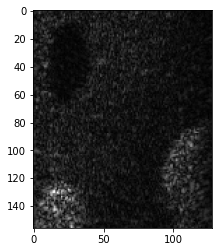

In [202]:
selected_img=cv2.imread(path1+"27/img_027__6_0.png")
plt.imshow(selected_img,cmap="gray")
selected_img.min(),selected_img.max()

4442892.023367967

# RF to B_mode using global max normaliztion

In [422]:
path="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/RF_data/"
path1="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/B_mode/"
for folder in os.listdir(path):                    ## directory for rf data
    os.makedirs(path1+folder) 
    for i,name in enumerate(os.listdir(path+folder)):           ## directory for b_mode images
        RFdata=scipy.io.loadmat(path+folder+"/"+name)
        if "ImageData" in RFdata:
            RFdata=RFdata["ImageData"]             ## after folder 07 there is ImageData befor there was ImgData
        else:
            RFdata=RFdata["ImgData"]               ## the data is stored in the form of dictionary where "ImgData" is of our
            RFdata=RFdata[0,0]                     ## interest (before 07 folder there was 3 channls)
#         print(name,RFdata.min())
        RFdata=cv2.resize(RFdata,(128,256),interpolation=cv2.INTER_NEAREST)   ## resizing data wrt 5Mhz freq data
        RFdata=RFdata[80:236,:]                   # 156 samples
        RFdata=RFdata/RFdata.max()               #Global Normalization
        RFdata=RFdata*255
        RFdata=RFdata.astype(np.uint8)
        if i==10:
            name=name[-8:].replace("mat","png")
        else:
            name="0"+name[-7:].replace("mat","png")
        save_name=f"img_0"+folder+"_"+name        #saving name generation
        cv2.imwrite(path1+"/"+folder+"/"+save_name,RFdata)

# Average for annotation

In [216]:
path1="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/B_mode/"
path2="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/Avg_annotation/"
for folder in os.listdir(path1):
    I=[]
    for name in os.listdir(path1+folder):
        img=cv2.imread(path1+folder+"/"+name)
        img=img[:,:,1]
        I.append(img)
    I=np.array(I,dtype=np.float64)
    avg=(sum(I)/len(I))
    avg=avg.astype(np.uint8)
    cv2.imwrite(path2+"/0"+folder+"_avg_img.png",avg)

In [183]:
avg.shape

(156, 128)

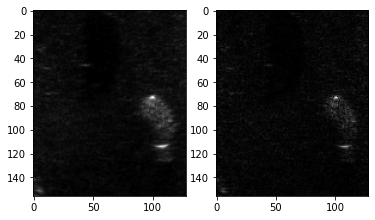

In [190]:
plt.subplot(121)
plt.imshow(avg,cmap="gray")
plt.subplot(122)
plt.imshow(img,cmap="gray")

In [67]:
name="img_003_05_5.mat"
name[-8:].replace("mat","png")

'05_5.png'

In [94]:
img.shape

(512, 128, 3)

# Label processing

In [376]:
path= "E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/abhinav_anotations/"
label=[]
for name in os.listdir(path):
    mask=cv2.imread(path+name)
    label.append(mask)
label=np.array(label)

In [364]:
label.shape

(60, 156, 128, 3)

# Visualizing images and correponding mask

Text(0.5, 1.0, 'mask')

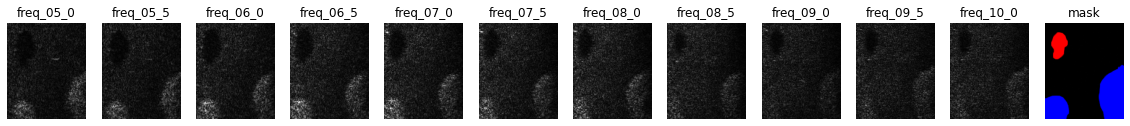

In [476]:
n=27
path1="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/B_mode/"
path2=path= "E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/abhinav_anotations/"
plt.figure(figsize=(20,20))
for i, name1 in enumerate(os.listdir(path1+f"{n:02d}")):
    I=cv2.imread(path1+f"{n:02d}/"+name1)
    plt.subplot(1,12,i+1)
    plt.imshow(I)
    plt.title("freq"+name1[-9:-4])
    plt.axis('off')
plt.subplot(1,12,12)
plt.imshow(label[n-1])
plt.axis('off')
plt.title("mask")

In [354]:
name1[-9:-4]

'__9_5'

# Histogram plotting for pixel distribution

[  0   1   2  13  22  29  43  56  71  77  78  93  95  97  98  99 100 121
 122 127 136 137 150 151 153 159 161 162 169 170 172 177 185 186 190 191
 192 194 195 196 199 201 202 207 209 210 211 212 215 217 218 219 220 222
 223 225 226 229 230 233 234 241 242 243 247 250 251 253 254 255]
[0 1 2]
[  0   1   2  29  43  56  57  78  96  97  98  99 100 122 126 136 137 141
 145 146 151 160 166 167 170 172 181 185 190 191 192 193 194 198 199 202
 207 208 211 212 214 217 220 221 222 225 226 227 230 231 232 234 240 241
 242 246 247 249 251 253 254 255]


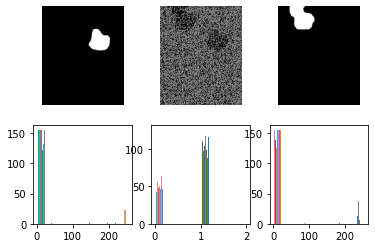

In [355]:
for i in range(3):
    plt.subplot(2,3,i+1)
    img=label[15][:,:,i]
    print(np.unique(img))
    plt.imshow(img,cmap="gray")
    plt.axis('off')
    plt.subplot(2,3,3+i+1)
    plt.hist(img)
#     print(np.unique(img))

# Channelwise pixel labelling (RGB to RGB_0_127_255)


In [387]:
path3= "E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/abhinav_anotations/"
path4= "E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/updated_annotation_RGB_0_127_255/"
update_label=[]
for name in os.listdir(path3):
    mask=cv2.imread(path3+name)
    for c in range(3):
        channel= mask[:,:,c]
        if c==0:
            pixel_val=127
        elif c==2:
            pixel_val=255
        else:
            pixel_val=0
        channel[channel<=200]=0
        channel[channel>200]=pixel_val
    update_label.append(mask)
    cv2.imwrite(path4+name,mask)
update_label=np.array(update_label)

In [389]:
np.unique(update_label)

array([  0, 127, 255], dtype=uint8)

In [379]:
update_label.shape

(60, 156, 128, 3)

[  0 127]
[0]
[  0 255]


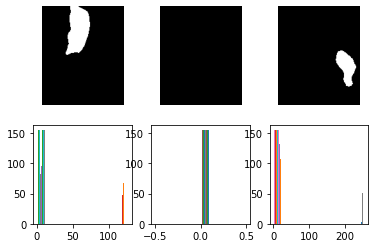

In [381]:
for i in range(3):
    plt.subplot(2,3,i+1)
    img=update_label[1][:,:,i]
    print(np.unique(img))
    plt.imshow(img,cmap="gray")
    plt.axis('off')
    plt.subplot(2,3,3+i+1)
    plt.hist(img)

# Single Grayscale mask

In [391]:
path4= "E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/updated_annotation_RGB_0_127_255/"
path5 ="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/Grayscale_mask/"
for name in os.listdir(path4):
    mask=cv2.imread(path4+name)
    gray=np.zeros((mask.shape[0],mask.shape[1]))
    gray[mask[:,:,0]==127]=127
    gray[mask[:,:,2]==255]=255
    cv2.imwrite(path5+name,gray)

Text(0.5, 1.0, 'mask')

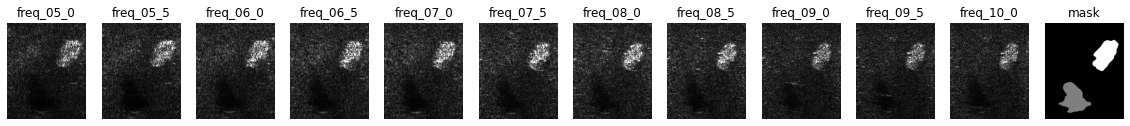

In [475]:
n=26
path1="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/B_mode/"
path5 ="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/Grayscale_mask/"
plt.figure(figsize=(20,20))
for i, name1 in enumerate(os.listdir(path1+f"{n:02d}")):
    I=cv2.imread(path1+f"{n:02d}/"+name1)
    plt.subplot(1,12,i+1)
    plt.imshow(I)
    plt.title("freq"+name1[-9:-4])
    plt.axis('off')
plt.subplot(1,12,12)
plt.imshow(cv2.imread(path5+f"{n:04d}.png"))
plt.axis('off')
plt.title("mask")

# Confidence_Map

In [59]:
pathc="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/MF_Confidence_map/"
path_ci="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/MF_Confidence_map_img/"
for f,folder in enumerate(os.listdir(pathc)):
    os.makedirs(path_ci+folder)
    for name in os.listdir(pathc+folder):
#         I=cv2.imread(pathc+folder+"/"+name)
        M=scipy.io.loadmat(pathc+folder+"/"+name)
        M=M["map"]
#         M=np.array(M)
#         cv2.imwrite(path_ci+folder+"/"+name,M)

In [62]:
cv2.imwrite("jaml.png",M)

True

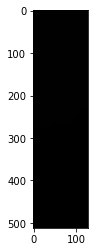

In [63]:
a=cv2.imread("jaml.png")
plt.imshow(a,cmap="gray")

In [48]:
pathc="E:/IIT KGP ADMISSION BMD/SEM 3/DATA/Multifrequency images/multifreqaquisition/RF_data/"
for f,folder in enumerate(os.listdir(pathc)):
    if f==59:
        for name in os.listdir(pathc+folder):
    #         I=cv2.imread(pathc+folder+"/"+name)
            M=scipy.io.loadmat(pathc+folder+"/"+name)
            print(M['ImageData'].shape)

(256, 128)
(282, 128)
(308, 128)
(334, 128)
(360, 128)
(384, 128)
(410, 128)
(436, 128)
(462, 128)
(488, 128)
(512, 128)


In [50]:
M

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jul 26 17:00:43 2022',
 '__version__': '1.0',
 '__globals__': [],
 'ImageData': array([[    0.        ,     0.        ,     0.        , ...,
             0.        ,     0.        ,     0.        ],
        [45294.72928911, 32673.10978073, 50565.30252367, ...,
          2211.37551083,  4447.48526663,  4271.86323505],
        [ 4394.68245575,  3129.91715172,  4988.24991592, ...,
             0.        ,     0.        ,   525.0789635 ],
        ...,
        [48954.27413133, 51214.11562237, 59402.06718045, ...,
         14236.7700793 , 18623.17528832,  7614.03069075],
        [52233.95119365, 59564.47599534, 81375.08111279, ...,
         28730.15110107, 14332.39668061,  7270.97525173],
        [45858.29640416, 69038.86305623, 63130.2457057 , ...,
         13506.46215878, 19940.23773299, 17318.0585293 ]])}

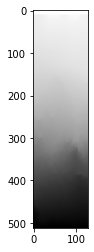

In [31]:
plt.imshow(cm,cmap="gray")